In [5]:
import glob
import pandas as pd
catdf = pd.DataFrame()
fn = glob.glob("train/cat.*.jpg")
catdf["path"] = fn
catdf["target"] = 0

dogdf = pd.DataFrame()
fn = glob.glob("train/dog.*.jpg")
dogdf["path"] = fn
dogdf["target"] = 1

df = pd.concat([catdf, dogdf], axis=0, ignore_index=True)
df

,path,target
0,train\cat.0.jpg,0
1,train\cat.1.jpg,0
2,train\cat.10.jpg,0
3,train\cat.100.jpg,0
4,train\cat.1000.jpg,0
5,train\cat.10000.jpg,0
6,train\cat.10001.jpg,0
7,train\cat.10002.jpg,0
8,train\cat.10003.jpg,0
9,train\cat.10004.jpg,0


In [10]:
# 什麼叫執行函式 但是答案又是一個功能
def test():
    return print
test()(3)

3


In [15]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout 
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
for l in vgg.layers:
    l.trainable = False
# Model的使用方式: tensor = 功能(tensor)
# 功能 = Layer()
x = Flatten()(vgg.output)
x = Dense(2048, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(2, activation="softmax")(x)
cnn = Model(inputs=vgg.input, outputs=x)
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [17]:
# 開始訓練 -> np array
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import numpy as np
x = np.array(df["path"])
y = np.array(df["target"])
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.1)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_train_cat[0]

array([0., 1.], dtype=float32)

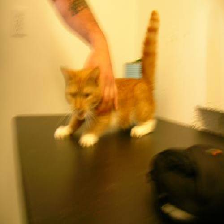

In [19]:
from keras.preprocessing.image import load_img
load_img(x[0], target_size=(224, 224))

In [26]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [29]:
# 他當初處理圖片的方式: 請一定使用
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
from keras.applications.vgg16 import preprocess_input
batch = 10
for i in range(10):
    idx = np.random.randint(0, x_train.shape[0], size=batch)
    img_train = []
    for p in x_train[idx]:
        img = load_img(p, target_size=(224, 224))
        img_np = np.array(img)
        # 圖該如何預處理呢?
        img_np_pre = preprocess_input(img_np)
        img_train.append(img_np_pre)
    img_train_np = np.array(img_train)
    ans = y_train_cat[idx]
    train_result = cnn.train_on_batch(img_train_np, ans)
    print("Train", i, ":", train_result)

    idx = np.random.randint(0, x_test.shape[0], size=batch)
    img_test = []
    for p in x_test[idx]:
        img = load_img(p, target_size=(224, 224))
        img_np = np.array(img)
        # 圖該如何預處理呢?
        img_np_pre = preprocess_input(img_np)
        img_test.append(img_np_pre)
    img_test_np = np.array(img_test)
    ans = y_test_cat[idx]
    test_result = cnn.test_on_batch(img_test_np, ans)
    print("Validate ", i, ":", test_result)

Train 0 : [8.059048, 0.5]
Validate  0 : [6.447238, 0.6]
Train 1 : [4.8354287, 0.7]
Validate  1 : [3.223619, 0.8]
Train 2 : [11.282667, 0.3]
Validate  2 : [6.447238, 0.6]
Train 3 : [11.282667, 0.3]
Validate  3 : [12.894476, 0.2]
Train 4 : [8.059048, 0.5]
Validate  4 : [8.059048, 0.5]
Train 5 : [8.059048, 0.5]
Validate  5 : [9.670857, 0.4]
Train 6 : [9.670857, 0.4]
Validate  6 : [4.8354287, 0.7]
Train 7 : [9.670857, 0.4]
Validate  7 : [11.282667, 0.3]
Train 8 : [8.059048, 0.5]
Validate  8 : [11.282667, 0.3]
Train 9 : [6.447238, 0.6]
Validate  9 : [6.447238, 0.6]


In [30]:
cnn.predict(img_test_np)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)